<br>
<h1 style = "font-size:30px; font-family:monospace ; font-weight : bold; color : #AE0052; text-align: center; border-radius: 10px 10px;">☔Rain Prediction in Australia☔</h1>
<br>

![](https://media0.giphy.com/media/tkMeNtj9FQYx2/giphy.gif)

<span style="font-size:20px;color:#0026D8;font-weight : bold">Dataset Description:</span>

**This dataset contains daily weather observations from numerous Australian weather stations.**
- **Date** - The date of observation<br>
- **Location** - The common name of the location of the weather station<br>
- **MinTemp** - The minimum temperature in degrees celsius<br>
- **MaxTemp** - The maximum temperature in degrees celsius<br>
- **Rainfall** - The amount of rainfall recorded for the day in mm<br>
- **Evaporation** - The so-called Class A pan evaporation (mm) in the 24 hours to 9am<br>
- **Sunshine** - The number of hours of bright sunshine in the day.<br>
- **WindGustDir** - The direction of the strongest wind gust in the 24 hours to midnight<br>
- **WindGustSpeed** - The speed (km/h) of the strongest wind gust in the 24 hours to midnight<br>
- **WindDir9am** - Direction of the wind at 9am<br>
- **WindDir3pm** - Direction of the wind at 3pm<br>
- **WindSpeed9am** - Wind speed (km/hr) averaged over 10 minutes prior to 9am<br>
- **WindSpeed3pm** - Wind speed (km/hr) averaged over 10 minutes prior to 3pm<br>
- **Humidity9am** - Humidity (percent) at 9am<br>
- **Humidity3pm** - Humidity (percent) at 3pm<br>
- **Pressure9am** - Atmospheric pressure (hpa) reduced to mean sea level at 9am<br>
- **Pressure3pm** - Atmospheric pressure (hpa) reduced to mean sea level at 3pm<br>
- **Cloud9am** - Fraction of sky obscured by cloud at 9am. This is measured in "oktas", which are a unit of                    eigths. It records how many eigths of the sky are obscured by cloud. A 0 measure indicates                    completely clear sky whilst an 8 indicates that it is completely overcast.<br>
- **Cloud3pm** - Fraction of sky obscured by cloud (in "oktas": eighths) at 3pm. See Cload9am for a description                of the values<br>
- **Temp9am** - Temperature (degrees C) at 9am<br>
- **Temp3pm** - Temperature (degrees C) at 3pm<br>
- **RainToday** - Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0<br>
- **RainTomorrow** - The target variable. Will it rain tomorrow?

<h1 style="background-color:#ABFF9B;font-size:20px;color:#00033E;font-weight : bold">Useful documentations</h1>

- **Logistic Regression** : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html <br>
- **SVM** : https://scikit-learn.org/stable/modules/svm.html <br>
- **Confusion Matrix** : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html <br>
- **Plot Confusion Matrix** : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html <br>
- **ROC_AUC Score** : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score <br>
- **Classification Report** : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html <br>
- **Label Encoder** : https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html <br>
- **Label Binarizer** : https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelBinarizer.html <br>
- **Standard Scaler** : https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html <br>
- **Cross Val Score** : https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html <br>



In [9]:
from IPython.display import HTML
HTML("""
<style>
h1,h2,h3 {
	margin: 1em 0 0.5em 0;
	font-weight: 600;
	font-family: 'Titillium Web', sans-serif;
	position: relative;  
	font-size: 36px;
	line-height: 40px;
	padding: 15px 15px 15px 2.5%;
	color: #13003A;
	box-shadow: 
		inset 0 0 0 1px rgba(53,86,129, 1), 
		inset 0 0 5px rgba(53,86,129, 1),
		inset -285px 0 35px white;
	border-radius: 0 10px 0 15px;
	background: #fff
    
}
</style>
""")


## ================================ ##

<h1 style="background-color:#ABFF9B;font-size:20px;color:#00033E;font-weight : bold">✅ Importing Required Libraries</h1>

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC



from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve




from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler



from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")

<h1 style="background-color:#ABFF9B;font-size:20px;color:#00033E;font-weight : bold">Reading the data </h1>

In [11]:
df = pd.read_csv("C:\\Users\\kumar\\SA2021_W3_Data.csv")
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2856,11,18.3,35.4,0.0,10.7,8.2,15,31,0,...,17,14,1012.8,1010.7,3,7,26.3,34.0,0,1
1,575,0,12.0,21.1,0.0,2.4,4.9,11,22,15,...,70,60,1022.3,1020.2,2,7,16.2,19.4,0,0
2,2037,6,11.9,17.0,1.6,5.6,0.8,5,48,4,...,71,88,1008.4,1004.7,7,7,14.6,13.3,1,1
3,2010,19,1.3,10.2,4.2,2.6,4.4,15,33,15,...,87,64,1018.4,1016.8,7,7,3.8,8.5,1,0
4,2895,18,23.7,31.5,0.0,11.0,12.1,4,35,2,...,53,50,1014.2,1010.2,3,1,29.1,30.4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24191,3231,16,20.8,24.4,0.0,7.6,7.9,1,48,4,...,56,56,1019.3,1016.6,5,2,23.0,23.8,0,0
24192,3405,16,10.7,20.1,0.6,1.2,6.4,13,22,13,...,89,69,1027.9,1024.4,2,6,11.9,18.7,0,0
24193,638,17,9.5,21.6,0.0,2.8,4.9,13,28,6,...,72,36,1019.2,1013.8,7,1,12.7,21.1,0,0
24194,987,11,5.5,9.0,0.8,0.8,0.6,8,43,7,...,91,83,1018.4,1017.9,8,8,7.1,7.8,0,1


In [12]:
## Checking the shape of data.##
df.shape


(24196, 23)

In [13]:
## Applying describe on dataframe ##
df.describe()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,24196.000000,24196.000000,24196.000000,24196.000000,24196.000000,24196.000000,24196.000000,24196.000000,24196.000000,24196.000000,...,24196.000000,24196.000000,24196.000000,24196.000000,24196.000000,24196.000000,24196.000000,24196.000000,24196.000000,24196.000000
mean,1702.554430,11.126880,13.281232,23.124078,3.008857,5.114329,6.700591,7.752273,42.371880,7.315424,...,69.505621,55.335345,1016.774682,1014.508518,4.767152,4.926682,17.609216,21.493420,0.293396,0.453918
std,837.645705,6.397324,6.084032,6.681013,8.399269,3.549384,3.958287,4.788052,14.221336,4.634019,...,17.671186,20.907040,6.987625,6.877345,2.741416,2.586083,6.189396,6.535474,0.455328,0.497882
min,0.000000,0.000000,-4.700000,4.100000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,...,3.000000,0.000000,980.500000,979.000000,0.000000,0.000000,-0.700000,3.700000,0.000000,0.000000
25%,984.000000,6.000000,8.600000,17.900000,0.000000,2.400000,3.400000,3.000000,31.000000,3.000000,...,58.000000,41.000000,1012.200000,1009.900000,2.000000,3.000000,12.700000,16.500000,0.000000,0.000000
50%,1651.000000,11.000000,13.100000,22.700000,0.000000,4.400000,7.200000,8.000000,41.000000,7.000000,...,70.000000,56.000000,1016.800000,1014.400000,6.000000,6.000000,17.300000,21.100000,0.000000,0.000000
75%,2381.000000,17.000000,18.000000,28.100000,1.800000,7.000000,10.000000,12.000000,50.000000,11.000000,...,83.000000,70.000000,1021.400000,1019.000000,7.000000,7.000000,22.300000,26.200000,1.000000,1.000000
max,3415.000000,22.000000,31.400000,46.800000,206.200000,59.800000,14.500000,15.000000,122.000000,15.000000,...,100.000000,100.000000,1040.200000,1037.000000,8.000000,9.000000,39.400000,46.100000,1.000000,1.000000


<h1 style="background-color:#ABFF9B;font-size:20px;color:#00033E;font-weight : bold">Checking if there is any missing values in the dataset </h1>

In [15]:
df.isna().sum()

# Y = df.RainTomorrow.values
# X = df.drop('RainTomorrow', axis=1)




Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

<h1 style="background-color:#ABFF9B;font-size:20px;color:#00033E;font-weight : bold">Separating target variable :</h1>

In [17]:

Y = df.RainTomorrow.values
X = df.drop('RainTomorrow', axis=1)




<h1 style="background-color:#ABFF9B;font-size:20px;color:#00033E;font-weight : bold">Spliting the data into train and test.</h1>

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=2021)



In [19]:
X_train.shape
X_test.shape
Y_train.shape
Y_test.shape


## Let us print the shapes:
    

print('x_train shape is: ', X_train.shape)
print('y_train shape is: ', Y_train.shape)
print('x_test shape is: ', X_test.shape)
print('y_test shape is: ', Y_test.shape)

## ================================ ##

x_train shape is:  (18147, 22)
y_train shape is:  (18147,)
x_test shape is:  (6049, 22)
y_test shape is:  (6049,)


<h1 style="background-color:#ABFF9B;font-size:20px;color:#00033E;font-weight : bold">Scaling the data using Standard Scaler :</h1>

In [20]:
scaler = StandardScaler()
# transform data
scaled = scaler.fit_transform(X_train)
scaled = scaler.fit_transform(X_test)




<h1 style="background-color:#ABFF9B;font-size:20px;color:#00033E;font-weight : bold">Training a Logistic Regression </h1>

In [21]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=2021).fit(X_train, Y_train)
y_predict = clf.predict(X_test)

<h1 style="background-color:#ABFF9B;font-size:20px;color:#00033E;font-weight : bold">Ploting Confusion Matrix using plot_confusion_matrix module :</h1>

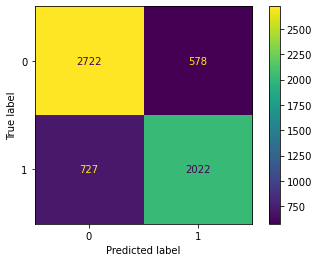

In [22]:
plot_confusion_matrix(clf, X_test, Y_test)  
plt.show()



<h1 style="background-color:#ABFF9B;font-size:20px;color:#00033E;font-weight : bold">Classification Report for LR :</h1>

In [23]:
print(classification_report(Y_test, y_predict))



              precision    recall  f1-score   support

           0       0.79      0.82      0.81      3300
           1       0.78      0.74      0.76      2749

    accuracy                           0.78      6049
   macro avg       0.78      0.78      0.78      6049
weighted avg       0.78      0.78      0.78      6049



<h1 style="background-color:#ABFF9B;font-size:20px;color:#00033E;font-weight : bold">Training and Testing Score along with Accuracy score for LR :</h1> 

In [24]:
print("Train Accuracy:",clf.score(X_train, Y_train))
print("Test Accuracy:",clf.score(X_test, Y_test))



Train Accuracy: 0.7909296302419133
Test Accuracy: 0.7842618614647049


In [25]:
print(accuracy_score(Y_test, y_predict))



0.7842618614647049


<h1 style="background-color:#ABFF9B;font-size:20px;color:#00033E;font-weight : bold">ROC - AUC Score for LR :</h1> 

In [26]:
print(roc_auc_score(Y_test, y_predict))



0.780194340641776


<h1 style="background-color:#ABFF9B;font-size:20px;color:#00033E;font-weight : bold">Training SVM with C = 50 and gamma = scale :</h1>

In [27]:
svm = SVC(probability=True, gamma='scale', C=50)
svm.fit(X_train, Y_train)
svm_predict = svm.predict(X_test)




<h1 style="background-color:#ABFF9B;font-size:20px;color:#00033E;font-weight : bold">Confusion Matrix for SVM :</h1>

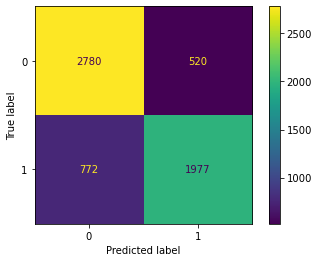

In [28]:
plot_confusion_matrix(svm, X_test, Y_test)  
plt.show()




<h1 style="background-color:#ABFF9B;font-size:20px;color:#00033E;font-weight : bold">Classification Report for SVM :</h1>

In [29]:
svm_predict = svm.predict(X_test)

print(classification_report(Y_test, svm_predict))



              precision    recall  f1-score   support

           0       0.78      0.84      0.81      3300
           1       0.79      0.72      0.75      2749

    accuracy                           0.79      6049
   macro avg       0.79      0.78      0.78      6049
weighted avg       0.79      0.79      0.79      6049



<h1 style="background-color:#ABFF9B;font-size:20px;color:#00033E;font-weight : bold">Accuracy score for SVM :</h1>

In [30]:

print(accuracy_score(Y_test, svm_predict))


0.7864109770209952


<h1 style="background-color:#ABFF9B;font-size:20px;color:#00033E;font-weight : bold">Training and Testing Score for SVM :</h1> 

In [31]:
print(svm.score(X_test, Y_test))
print(svm.score(X_train, Y_train))



0.7864109770209952
0.7941808563398909


<h1 style="background-color:#ABFF9B;font-size:20px;color:#00033E;font-weight : bold">ROC - AUC score for SVM :</h1> 

In [32]:
print(roc_auc_score(Y_test, svm_predict))



0.7807974249589382


<h1 style="background-color:#ABFF9B;font-size:20px;color:#00033E;font-weight : bold">Training SVM with C = 1 and gamma = scale :</h1> 

In [33]:
svm2 = SVC(gamma='scale', C=1)
svm2.fit(X_train, Y_train)
svm2_predict = svm2.predict(X_test)



<h1 style="background-color:#ABFF9B;font-size:20px;color:#00033E;font-weight : bold">Classification Report for new SVM :</h1>

In [34]:
print(classification_report(Y_test, svm2_predict))


              precision    recall  f1-score   support

           0       0.74      0.87      0.80      3300
           1       0.80      0.63      0.70      2749

    accuracy                           0.76      6049
   macro avg       0.77      0.75      0.75      6049
weighted avg       0.76      0.76      0.75      6049



<h1 style="background-color:#ABFF9B;font-size:20px;color:#00033E;font-weight : bold">ROC - AUC score for the new SVM :</h1> 

In [35]:
print(roc_auc_score(Y_test, svm2_predict))



0.7475082950273929


<h1 style="background-color:#ABFF9B;font-size:20px;color:#00033E;font-weight : bold">Confusion matrix and accuracy score for the new SVM :</h1> 

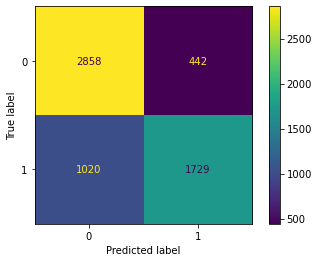

In [36]:
plot_confusion_matrix(svm2, X_test, Y_test)  
plt.show()



In [37]:
print(accuracy_score(Y_test, svm2_predict))


0.7583071582079682


<h1 style="background-color:#ABFF9B;font-size:20px;color:#00033E;font-weight : bold">Average Cross-Val score for the new SVM with 5 folds  :</h1> 

In [38]:
scores = cross_val_score(svm2, X, Y, cv=5)

print(scores.mean())





0.7683091496603869


<br>
<h1 style = "font-size:30px; font-family:Brush Script MT ; font-weight : bold; color : #0331A8; text-align: center; border-radius: 10px 10px;">The End</h1>
<br>